In [1]:
import numpy

import networkx
import matplotlib.pyplot as plt
import pandas as pd

from bn.bayesian_network import BayesianNetwork
from bn.structure_distribution import Structure
from bn.variable import Variable

In [2]:
difficulty = Variable(
  "difficulty",
  ["easy", "hard"],
  pd.DataFrame(
    {"difficulty": ["easy", "hard"],
     "probability": [0.6, 0.4]}))
print(difficulty.lpd)

  difficulty  probability
0       easy          0.6
1       hard          0.4


In [3]:
has_studied = Variable(
  "has_studied",
  ["no", "yes"],
  pd.DataFrame(
    {"has_studied": ["no", "yes"],
     "probability": [0.7, 0.3]}))
print(has_studied.lpd)

  has_studied  probability
0          no          0.7
1         yes          0.3


In [4]:
sat = Variable(
  "sat",
  ["low", "high"],
  pd.DataFrame(
    {"has_studied": ["no", "no", "yes", "yes"],
     "sat": ["low", "high", "low", "high"],
     "probability": [0.95, 0.05, 0.2, 0.8]}))
print(sat.lpd)

  has_studied   sat  probability
0          no   low         0.95
1          no  high         0.05
2         yes   low         0.20
3         yes  high         0.80


In [5]:
letter = Variable(
  "letter",
  ["weak", "strong"],
  pd.DataFrame(
    {"grade": ["good", "good", "ok", "ok", "bad", "bad"],
     "letter": ["weak", "strong", "weak", "strong", "weak", "strong"],
     "probability": [0.1, 0.9, 0.4, 0.6, 0.99, 0.01]}))
print(letter.lpd)

  grade  letter  probability
0  good    weak         0.10
1  good  strong         0.90
2    ok    weak         0.40
3    ok  strong         0.60
4   bad    weak         0.99
5   bad  strong         0.01


In [6]:
grade = Variable(
  "grade",
  ["good", "ok", "bad"],
  pd.DataFrame(
    {"difficulty": ["easy", "easy", "easy", 
                    "hard", "hard", "hard", 
                    "easy", "easy", "easy", 
                    "hard", "hard", "hard"],
     "has_studied": ["no", "no", "no", 
                     "no", "no", "no", 
                     "yes", "yes", "yes",
                     "yes", "yes", "yes"],
     "grade": ["good", "ok", "bad", 
               "good", "ok", "bad",
               "good", "ok", "bad",
               "good", "ok", "bad"],
     "probability": [0.3, 0.4, 0.3, 
                     0.05, 0.25, 0.7, 
                     0.9, 0.08, 0.02,
                     0.5, 0.3, 0.2]}))
print(grade.lpd)

   difficulty has_studied grade  probability
0        easy          no  good         0.30
1        easy          no    ok         0.40
2        easy          no   bad         0.30
3        hard          no  good         0.05
4        hard          no    ok         0.25
5        hard          no   bad         0.70
6        easy         yes  good         0.90
7        easy         yes    ok         0.08
8        easy         yes   bad         0.02
9        hard         yes  good         0.50
10       hard         yes    ok         0.30
11       hard         yes   bad         0.20


In [7]:
adj = numpy.array(
  [
      [0, 1, 0, 0, 0],
      [0, 0, 0, 1, 0],
      [0, 1, 0, 0, 1],
      [0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0]
  ], dtype=numpy.int8)

In [10]:
bn = BayesianNetwork([difficulty, grade, has_studied, letter, sat], adj)
G = bn.as_graph()

In [11]:
layout = networkx.shell_layout(G)
layout[difficulty] = numpy.array([2, 4])
layout[has_studied] = numpy.array([4, 4])
layout[grade] = numpy.array([3, 3])
layout[letter] = numpy.array([3, 2])
layout[sat] = numpy.array([4, 3])

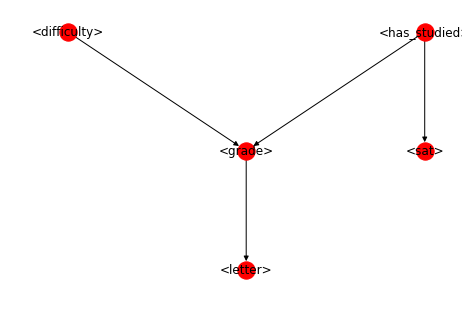

In [13]:
networkx.draw(G, pos=layout, with_labels=True)

In [14]:
data = bn.sample_data(100)
data.head()

,difficulty,grade,has_studied,letter,sat
0,easy,good,yes,strong,low
1,easy,ok,yes,weak,high
2,easy,good,no,strong,low
3,hard,good,yes,strong,high
4,easy,good,no,strong,high


In [15]:
distr = Structure([difficulty, grade, has_studied, letter, sat])

In [16]:
numpy.random.seed(23)
adj = numpy.zeros_like(adj, dtype=numpy.int8)
best, best_score = adj, -numpy.Inf
for i in range(100):
    adj, score = distr.posterior_sample(data, adj)
    if best_score < score:
        best = adj
        best_score = score

True


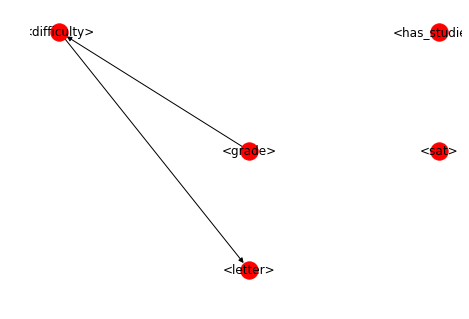

In [17]:
G = bn.as_graph(best)
print(networkx.is_directed_acyclic_graph(G))
networkx.draw(G, pos=layout, with_labels=True)
plt.show()